In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding

from tensorflow.keras.models import Model

In [3]:
# you can import this from kaggle

In [4]:
#data processing

In [15]:
df = pd.read_csv('potentially_abuse_V2.csv',encoding='unicode_escape')

In [16]:
df.head()

,label,selftext,role
0,1,However my stepfather was intoxicated and ass...,perpetrator
1,1,I (27f) have recently escaped an abusive relat...,victim
2,1,Is anyone aware of an online support group for...,victim
3,1,Has anyone had to show up for the abuser__ con...,victim
4,1,There was a fair amount of financial abuse in...,witness


In [17]:
# drop unnecessary columns
df = df.drop(["role"], axis=1)

In [18]:
df.head()

,label,selftext
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [19]:
# rename columns to something better
df.columns = ['labels', 'data']

In [20]:
df.head()

,labels,data
0,1,However my stepfather was intoxicated and ass...
1,1,I (27f) have recently escaped an abusive relat...
2,1,Is anyone aware of an online support group for...
3,1,Has anyone had to show up for the abuser__ con...
4,1,There was a fair amount of financial abuse in...


In [23]:
df["label_numerics"]= df["labels"]
Y = df["label_numerics"].values

In [24]:
df

,labels,data,label_numerics
0,1,However my stepfather was intoxicated and ass...,1
1,1,I (27f) have recently escaped an abusive relat...,1
2,1,Is anyone aware of an online support group for...,1
3,1,Has anyone had to show up for the abuser__ con...,1
4,1,There was a fair amount of financial abuse in...,1
...,...,...,...
995,0,He told me that he would NEVER lay a finger o...,0
996,0,But he told me that he has a problem with alc...,0
997,0,The first time he Was drunk and I pissed him ...,0
998,1,He dragged me down my hallway into my garage,1


In [25]:
df['b_labels'] = df['labels']
Y = df['b_labels'].values

In [26]:
#TRAIN TEST SPLIT

In [122]:
df_train, df_test,Ytrain, Ytest= train_test_split(df['data'], Y, test_size=0.2)

In [153]:
max_words=5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train)

In [154]:
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test= tokenizer.texts_to_sequences(df_test)

In [155]:
sequences_train

[[8,
  84,
  8,
  390,
  187,
  32,
  254,
  8,
  93,
  2,
  734,
  188,
  13,
  571,
  2,
  735,
  25,
  1,
  2,
  4,
  1123,
  1124,
  128,
  276,
  9,
  6,
  391,
  2,
  59,
  45,
  1125,
  13,
  7,
  219],
 [9, 6, 171, 189, 8, 29, 220, 36, 55, 30, 462],
 [232, 1126, 7, 572, 3, 19, 7, 154, 1127],
 [15,
  29,
  24,
  120,
  70,
  2,
  190,
  94,
  71,
  14,
  573,
  87,
  6,
  736,
  10,
  277,
  2,
  1,
  64,
  27,
  463,
  32,
  17,
  67,
  15,
  34,
  7,
  392,
  255,
  308,
  172],
 [464, 465, 466, 393, 1128, 1129, 221, 205, 2, 129, 32, 6],
 [87,
  1130,
  1,
  64,
  7,
  309,
  142,
  7,
  66,
  72,
  1,
  19,
  24,
  467,
  31,
  4,
  574,
  2,
  191,
  121,
  3,
  6,
  1131,
  12,
  20,
  52,
  394,
  3,
  310],
 [4,
  130,
  173,
  29,
  7,
  575,
  395,
  2,
  29,
  737,
  3,
  576,
  13,
  468,
  192,
  1132,
  22,
  577],
 [35, 469, 32, 36, 278, 193, 2, 347, 33, 68, 348, 206, 6, 396, 180, 1, 397],
 [74, 8, 233, 5, 9, 7, 1133],
 [173,
  470,
  75,
  3,
  45,
  1134,
  1135,

In [156]:
sequences_test

[[213, 3, 308, 31, 16, 5],
 [67, 1, 365, 31, 1, 814, 15, 18, 54, 149, 26, 131, 3, 470, 5, 2, 4, 123],
 [1, 49, 12, 20, 707, 280, 475, 1988],
 [244,
  28,
  7,
  65,
  244,
  60,
  164,
  2,
  8,
  18,
  6,
  250,
  1,
  331,
  74,
  30,
  10,
  6,
  160,
  626,
  6,
  6,
  82,
  6,
  131,
  12,
  1,
  550,
  46,
  398,
  195],
 [1, 103, 28, 20, 128, 60, 2182, 31, 9, 4, 252],
 [132, 23, 255, 1311],
 [8, 24, 510, 3, 36, 115, 30, 10, 6, 403, 33, 2, 1155, 57, 2, 57, 181],
 [1,
  34,
  83,
  1017,
  51,
  11,
  81,
  3,
  45,
  76,
  25,
  1,
  1027,
  9,
  1062,
  8,
  44,
  45,
  6,
  113,
  65,
  1,
  128,
  286,
  3],
 [4, 805, 26, 52, 11, 1263, 293, 1264],
 [175,
  6,
  6,
  195,
  68,
  8,
  5,
  246,
  1,
  19,
  1079,
  10,
  234,
  289,
  544,
  30,
  10,
  4,
  38,
  1152,
  1546],
 [41, 178, 64, 9, 6, 620, 1, 172, 89, 6],
 [1, 146, 134, 9, 6, 90, 1, 11, 94, 9],
 [17, 24, 245, 186, 37, 87, 1, 240, 4, 100, 3, 135, 147],
 [8, 546, 5, 89, 7, 850, 10, 1602, 148, 8, 1035, 5, 23, 6],
 [

In [157]:
tokenizer.word_docs

defaultdict(int,
            {'he': 176,
             'could': 14,
             'a': 232,
             'companion': 1,
             'the': 231,
             'money': 13,
             'for': 124,
             'apartment': 5,
             'sent': 2,
             'so': 67,
             'said': 21,
             'animals': 1,
             'and': 353,
             'be': 51,
             'about': 64,
             'i': 418,
             'my': 316,
             'stay': 8,
             'bad': 13,
             'everything': 9,
             'did': 20,
             'while': 10,
             'food': 2,
             'felt': 5,
             'homeless': 1,
             'not': 42,
             'rent': 3,
             'in': 170,
             'out': 59,
             'past': 15,
             'month': 11,
             'has': 73,
             'choked': 10,
             'his': 58,
             'twice': 4,
             'ex': 44,
             'active': 1,
             'create': 1,
             "i'll": 6,
      

In [158]:
V= len(tokenizer.word_docs) # NO OF UNIQUE TOKENS
V

2193

In [159]:
#Pad TRAIN DATA sequences with max length T 

In [160]:
data_train = pad_sequences(sequences_train)

In [161]:
data_train

array([[   0,    0,    0, ...,   13,    7,  219],
       [   0,    0,    0, ...,   55,   30,  462],
       [   0,    0,    0, ...,    7,  154, 1127],
       ...,
       [   0,    0,    0, ...,  551,    3,  119],
       [   0,    0,    0, ...,    2, 1105,    5],
       [   0,    0,    0, ..., 2192, 2193,    5]], dtype=int32)

In [162]:
data_train.shape

(800, 1321)

In [163]:
T= data_train.shape[1]

In [164]:
T

1321

In [165]:
#Pad TEST DATA sequences with max length T

In [166]:
data_test = pad_sequences(sequences_test, maxlen=T)


In [167]:
data_test

array([[   0,    0,    0, ...,   31,   16,    5],
       [   0,    0,    0, ...,    2,    4,  123],
       [   0,    0,    0, ...,  280,  475, 1988],
       ...,
       [   0,    0,    0, ...,  135, 1067,    2],
       [   0,    0,    0, ...,    2,    4,  130],
       [   0,    0,    0, ...,   10,  582,  181]], dtype=int32)

In [168]:
data_train.shape

(800, 1321)

In [169]:
data_test.shape

(200, 1321)

In [170]:
data_train.shape[1]

1321

In [171]:
V= len(tokenizer.word_docs)
T = data_train.shape[1] #features

In [172]:
 #TF SHAPES
#   2000(word_embeddings) x D(just choose dimensions)x  T 162(features)

In [173]:
#THIS IS THE CHANGE FROM RNN

In [174]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [175]:
D=20
#V is full length of the word vector
#T is number of features

i=Input(shape=(T,))

x=Embedding(V+1,D)(i)
print(x)

x=Conv1D(32,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

x=Conv1D(64,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

x=Conv1D(128,3,activation="relu")(x)  #these are industry best numbers from papers
print(x)

x=MaxPooling1D(3)(x)#uses max pooling to reduce information to max 
print(x)

#Final output with 1 output 1 hence sigmoid
x=Dense(1, activation="sigmoid")(x)
print(x)

model = Model(i,x)


KerasTensor(type_spec=TensorSpec(shape=(None, 1321, 20), dtype=tf.float32, name=None), name='embedding_3/embedding_lookup/Identity_1:0', description="created by layer 'embedding_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1319, 32), dtype=tf.float32, name=None), name='conv1d_9/Relu:0', description="created by layer 'conv1d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 439, 32), dtype=tf.float32, name=None), name='max_pooling1d_9/Squeeze:0', description="created by layer 'max_pooling1d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 437, 64), dtype=tf.float32, name=None), name='conv1d_10/Relu:0', description="created by layer 'conv1d_10'")
KerasTensor(type_spec=TensorSpec(shape=(None, 145, 64), dtype=tf.float32, name=None), name='max_pooling1d_10/Squeeze:0', description="created by layer 'max_pooling1d_10'")
KerasTensor(type_spec=TensorSpec(shape=(None, 143, 128), dtype=tf.float32, name=None), name='conv1d_11/Relu:0', description="created by layer 'conv1d_11'")
KerasTenso

In [176]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1321)]            0         
                                                                 
 embedding_3 (Embedding)     (None, 1321, 20)          43880     
                                                                 
 conv1d_9 (Conv1D)           (None, 1319, 32)          1952      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 439, 32)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 437, 64)           6208      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 145, 64)          0         
 g1D)                                                      

In [177]:
Ytrain = np.asarray(Ytrain).astype('float32').reshape((-1,1))
Ytest = np.asarray(Ytest).astype('float32').reshape((-1,1))

In [178]:
#COMPILE THE MODEL

In [179]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
25/25 [==============================] - 1s 38ms/step - loss: 0.6920 - accuracy: 0.5238 - val_loss: 0.6976 - val_accuracy: 0.4700
Epoch 2/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6919 - accuracy: 0.5312 - val_loss: 0.7021 - val_accuracy: 0.4700
Epoch 3/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6913 - accuracy: 0.5312 - val_loss: 0.6971 - val_accuracy: 0.4700
Epoch 4/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6905 - accuracy: 0.5312 - val_loss: 0.6977 - val_accuracy: 0.4700
Epoch 5/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6898 - accuracy: 0.5312 - val_loss: 0.6963 - val_accuracy: 0.4700
Epoch 6/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6899 - accuracy: 0.5312 - val_loss: 0.6960 - val_accuracy: 0.4700
Epoch 7/10
25/25 [==============================] - 1s 33ms/step - loss: 0.6903 - accuracy: 0.5312 - val_loss: 0.6973 - val_accuracy: 0.

In [180]:
import matplotlib.pyplot as plt

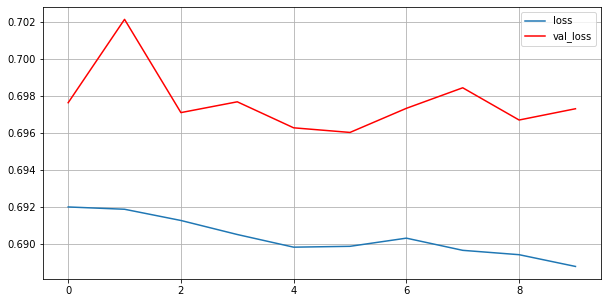

In [181]:
plt.figure(figsize=(10,5))


plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss' , color="red")
plt.grid()
plt.legend()

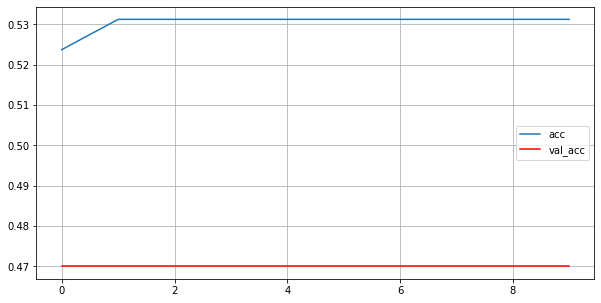

In [182]:
plt.figure(figsize=(10,5))

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc',color="red")
plt.grid()
plt.legend()

In [183]:
#LETS PREDICT IT .. FUN PART

In [184]:
#Reset the index in test data

In [185]:
df_test

456                           Wanted to break up with me
959     As I grew up I realized she is an emotionally...
617       I know that this doesn't make sense rationally
26      It's like a roller coaster ride __ One minute...
847        I feel like this could all blow up in my face
                             ...                        
744    I (26 F) recently moved back to my college tow...
963    My best friend used to hang out with this guy ...
11     A couple of days ago my friend's husband was t...
250                  She insults my mother and my father
104     Every night I prayed to god to make my father...
Name: data, Length: 200, dtype: object

In [91]:
df_test2=df_test.reset_index()

In [92]:
df_test2=df_test2.drop(columns=["index"])

In [93]:
df_test2.shape

(330, 1)

In [111]:
#exploration
instance=38

In [112]:
df_test2.loc[instance]

data     So yesterday my girlfriend and I broke up
Name: 38, dtype: object

In [113]:
df_test2.loc[instance][0]

' So yesterday my girlfriend and I broke up'

In [114]:
Ytest.shape

(330, 1)

In [115]:
Ytest[instance]

array([0.], dtype=float32)

In [116]:
#indexes for all the spam

In [117]:
np.where(Ytest==1)

(array([  0,   1,   2,   5,   6,   7,   9,  10,  12,  13,  14,  16,  21,
         22,  24,  25,  26,  27,  28,  29,  30,  34,  35,  37,  42,  43,
         44,  45,  47,  49,  56,  58,  66,  67,  69,  70,  71,  73,  75,
         76,  77,  78,  80,  86,  88,  89,  90,  92,  94,  95,  97,  99,
        101, 103, 104, 105, 106, 107, 111, 112, 113, 115, 116, 118, 120,
        121, 122, 123, 125, 126, 127, 128, 129, 131, 132, 140, 141, 145,
        147, 148, 153, 154, 155, 156, 158, 159, 161, 166, 168, 170, 172,
        174, 175, 179, 181, 183, 185, 187, 190, 195, 196, 199, 200, 202,
        206, 207, 216, 218, 219, 220, 221, 222, 227, 229, 232, 234, 237,
        239, 240, 242, 245, 247, 248, 249, 252, 256, 257, 259, 261, 262,
        264, 265, 267, 272, 276, 277, 278, 279, 280, 281, 282, 283, 285,
        286, 290, 293, 295, 299, 304, 305, 309, 310, 311, 312, 313, 315,
        316, 317, 319, 320, 325, 326, 328, 329]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


In [118]:
Ytest[instance]

array([0.], dtype=float32)

In [119]:
df_test2.loc[1]

data    I broke up with my abusive ex 2 days ago
Name: 1, dtype: object

In [120]:
k=pad_sequences(tokenizer.texts_to_sequences(df_test2.loc[instance]),maxlen=162)

In [121]:
p=model.predict(k)

ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 1321), found shape=(None, 162)


In [93]:
max(p.flatten())

0.15734133

In [94]:
round(max(p.flatten()))

0.0

In [ ]:
#LETS TRY ANOTHER

In [96]:
Ytest[1826]

1

In [97]:
[df_test2.loc[1826][0]]

['U are subscribed to the best Mobile Content Service in the UK for å£3 per 10 days until you send STOP to 82324. Helpline 08706091795']

In [98]:
test_token=pad_sequences(tokenizer.texts_to_sequences([df_test2.loc[1826][0]]),maxlen=162)

In [99]:
model.predict(test_token)

array([[[0.15734133],
        [0.15734133],
        [0.15734133],
        [0.15734133],
        [0.9996983 ]]], dtype=float32)

In [ ]:
p=model.predict(test_token)

In [145]:
# LETS TRY WITH OUT OWN TEXT

In [321]:
test="Of course we’ve knocked down our prices for Boxing Week! Boxing glove Save big on games, accessories, and more: https://bit.ly/3mIvsRT"

In [322]:
test_Series=pd.Series(test)

In [323]:
k=pad_sequences(tokenizer.texts_to_sequences(test_Series),maxlen=162)

In [324]:
model.predict(k)

array([[0.00298834]], dtype=float32)

In [277]:
k

array([[  0,   0,   0, ...,   0,   0, 818],
       [  0,   0,   0, ...,   0,   0,  78],
       [  0,   0,   0, ...,   0,   0, 160],
       ...,
       [  0,   0,   0, ...,   0,   0, 216],
       [  0,   0,   0, ...,   0,   0, 845],
       [  0,   0,   0, ...,   0,   0,  80]], dtype=int32)